In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- The dataset contains 891 rows and 12 columns.
- The following columns contain missing values:
Age: has 177 missing entries (~20% of the data)
Cabin: has over 600 missing values → highly incomplete
Embarked: only 2 missing values

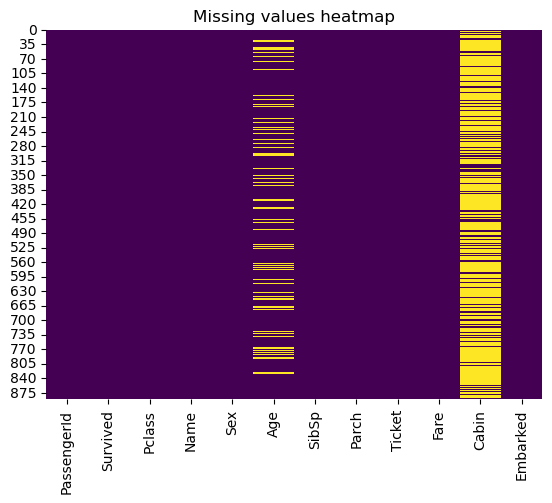

In [5]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing values heatmap")
plt.show()

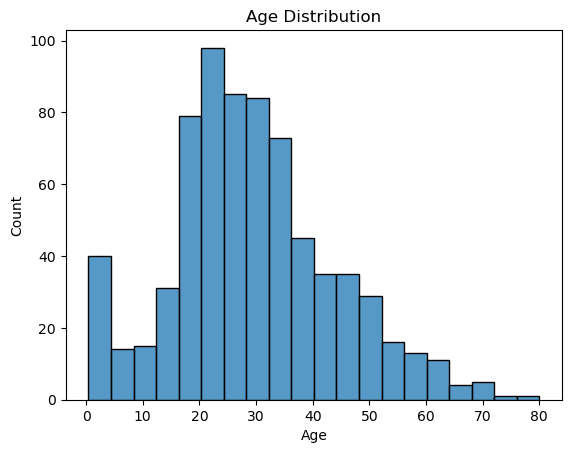

In [6]:
# Age is approximately normally distributed but slightly skewed toward younger ages.
sns.histplot(df['Age'].dropna())
plt.title("Age Distribution")
plt.show()

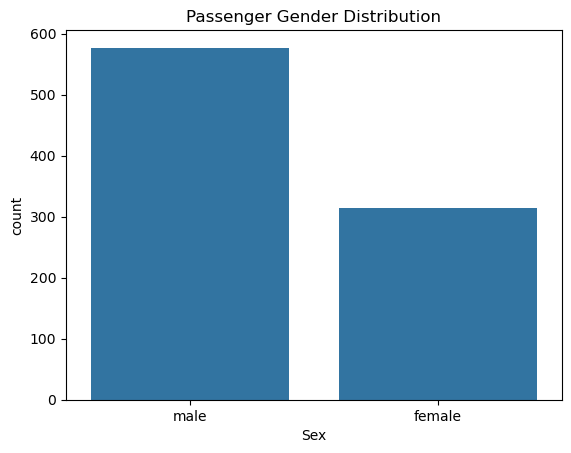

In [7]:
# Around 65% of passengers are male, 35% are female.
sns.countplot(data=df, x='Sex')
plt.title("Passenger Gender Distribution")
plt.show()

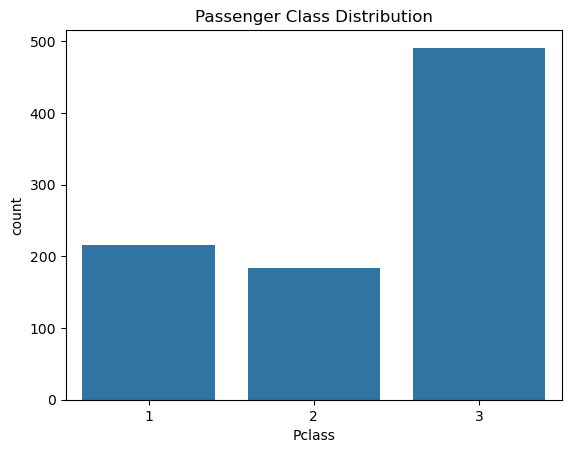

In [8]:
# The majority of passengers were in 3rd class.
sns.countplot(data=df, x='Pclass')
plt.title("Passenger Class Distribution")
plt.show()

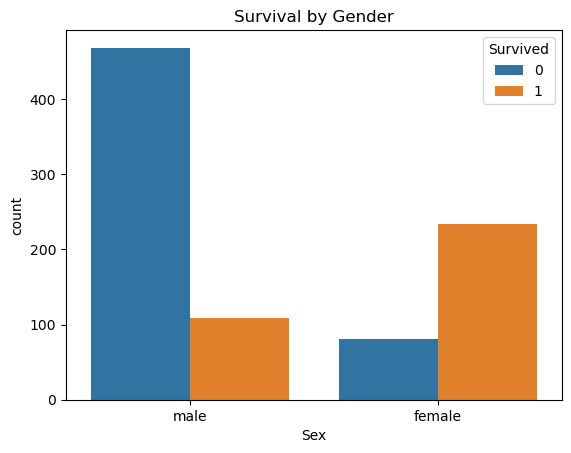

In [9]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()

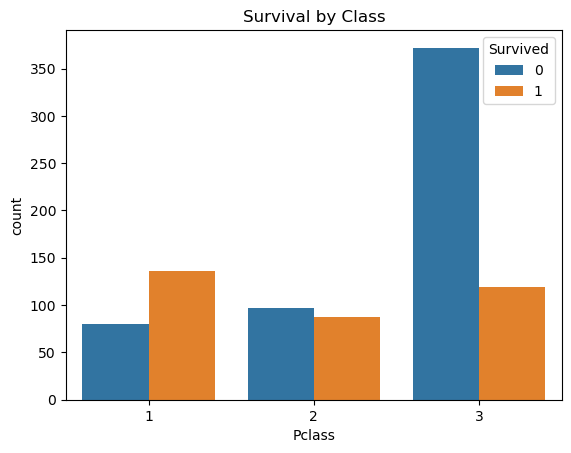

In [10]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Class")
plt.show()

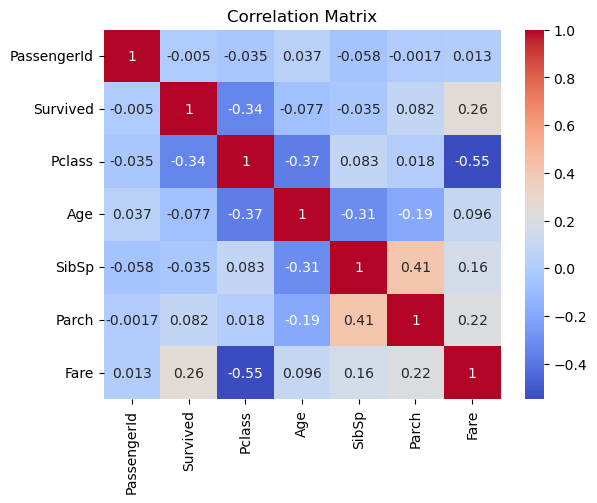

In [11]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# Pclass has a negative correlation with Survived (~ -0.34) → lower class, lower chance of survival.

# Fare has a positive correlation → passengers who paid higher fares were more likely to survive.

# Age has a very weak correlation (~ -0.08), suggesting limited impact.


In [12]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [13]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [14]:
missing_counts = df.isnull().sum()

# Calculate percentage of missing values
missing_percentages = 100 * df.isnull().sum() / len(df)

# Combine counts and percentages in a single dataframe
missing_table = pd.concat(
    [missing_counts, missing_percentages],
    axis=1,
    keys=["Missing Count", "Missing Percentage"],
)
missing_table


,Missing Count,Missing Percentage
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


Three Common Methods for Handling Missing Data:
1. Mean Imputation
Description: Replace missing values with the mean of the column.

Best for: Numerical columns with normally distributed data.

Limitation: Sensitive to outliers — extreme values can skew the mean.

2. Median Imputation
Description: Replace missing values with the median (the middle value).

Best for: Numerical columns with skewed distributions or outliers.

Advantage: More robust than the mean when data contains outliers.

3. Mode Imputation
Description: Replace missing values with the most frequent value (mode).

Best for: Categorical columns (like gender, city, class).

Advantage: Keeps the most common value; useful when only a few values are missing.

Chosen Methods for the Titanic Dataset:

Age column → Use Median
Age is a numerical feature with many missing values (~20%).

The distribution of age is not perfectly normal — it's slightly skewed.

Using the median helps reduce the impact of outliers (e.g., very young or very old ages).

Embarked column → Use Mode
Embarked is a categorical feature with only 2 missing values.

We use the mode (most frequent port) to fill the missing entries.

Cabin column → Drop the Column
Over 77% of the values in Cabin are missing.

Imputing would introduce a lot of noise and reduce model accuracy.

Therefore, we choose to drop the column entirely.



In [15]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipykernel_1279/1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [16]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipykernel_1279/3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [17]:
df.drop(columns=['Cabin'], inplace=True)

5 Common Methods to Convert Categorical to Numerical Data
1. Label Encoding
Assigns a unique integer (0, 1, 2, ...) to each category.

Good for ordinal data (ordered categories).

Risky for nominal data (no order), as it may imply an artificial ranking.

2. One-Hot Encoding
Creates one column per category with binary values (1 if the row belongs to that category, 0 otherwise).

Best for nominal data with few unique values.

Can lead to high dimensionality if too many categories.

3. Ordinal Encoding
Similar to Label Encoding but uses a meaningful order for categories.

Best for ordinal features (like Beginner < Intermediate < Expert).


4. Frequency Encoding
Replaces each category with the number of times it appears in the column.

Useful for high-cardinality features.

Doesn’t preserve semantics, but helps reduce dimensionality.

Target Encoding
Replaces categories with the mean of the target variable (e.g., Survived) for that category.

Powerful, but can lead to data leakage if not handled correctly (e.g., should be used with cross-validation).

"Sex"
Only 2 values: male, female

Best method: Label Encoding or One-Hot Encoding
Since it’s binary, either works. Label Encoding is simpler.


In [20]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

Embarked
3 categories: S, C, Q

Best method: One-Hot Encoding
Because it's nominal and low-cardinality.

In [34]:
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,False,True


Ticket
High-cardinality with many unique values (over 600)

Best method: Frequency Encoding
One-hot would create too many columns and isn’t practical.

In [38]:
ticket_freq = df['Ticket'].value_counts()
df['Ticket'] = df['Ticket'].map(ticket_freq)

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,1,71.2833,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,1,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,2,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,1,8.0500,False,False,True


In [41]:
repeated_tickets = ticket_freq[ticket_freq > 1]
repeated_tickets

Ticket
1601        7
CA. 2343    7
347082      7
3101295     6
CA 2144     6
           ..
231919      2
244367      2
2668        2
PC 17761    2
PP 9549     2
Name: count, Length: 134, dtype: int64

The goal is to extract a useful feature from the "Name" column, which contains the full names of individuals, that shows the person's title. Titles like "Mr", "Mrs", or "Dr" can provide important information such as gender, age, or social status, which can be effective in predicting survival.

In [42]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Map rare titles to a common group if needed
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Sir', 'Jonkheer', 'Don', 'Dona'], 'Rare')
df['Title'] = df['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dr': 4, 'Rev': 5, 'Rare': 6})


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_1279/3935441897.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1,7.2500,False,False,True,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,1,71.2833,True,False,False,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,1,7.9250,False,False,True,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,2,53.1000,False,False,True,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,1,8.0500,False,False,True,0.0


In [44]:
df['Title'] = df['Title'].fillna(6)

This parameter ensures that train_test_split preserves the class distribution of y in both the training and test sets. (stratify=y)

In [47]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'])
y = df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


In [49]:
y.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Yes, the target variable Survived has a relatively imbalanced distribution.

This distribution is somewhat imbalanced, but not extremely so.
In machine learning problems, if one class (e.g., survivors) is significantly smaller than the other, the model may default to always predicting the majority class to achieve high accuracy — but in reality, its performance will be poor.

Example: If the model always predicts that everyone died, it gets 62% accuracy — but that’s not useful at all!

Three common methods for handling imbalanced data:
1. Oversampling (increasing the data for the minority class)
In this method, we duplicate the minority class (survivors) or generate synthetic data (e.g., using SMOTE).

✅ Advantage: Balances the class distribution.
❌ Disadvantage: May lead to overfitting due to repeated data.

2. Undersampling (reducing the data from the majority class)
In this method, we remove some samples from the majority class to match the minority class size.

✅ Advantage: Simple and fast.
❌ Disadvantage: Risk of losing important information.

3. Class Weights (assigning more weight to the minority class during training)
In this method, we assign a higher weight to the minority class when training the model (e.g., in Logistic Regression, SVM, or Neural Networks).

✅ Advantage: Increases model focus on the minority class without changing the data.
❌ Disadvantage: Sometimes tuning the weights can be challenging.

✅ class_weight parameter
This forces the model to treat the minority class (survivors) as more important.